# D. M√î H√åNH H·ªåC M√ÅY

Tr∆∞·ªõc ti√™n c·∫ßn import m·ªôt s·ªë th∆∞ vi·ªán c·∫ßn thi·∫øt

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# I. B√ÄI TO√ÅN ƒê·∫∂T RA

**B√†i to√°n ƒë·∫∑t ra:**

D·ª± ƒëo√°n li·ªáu r·∫±ng nh√¢n vi√™n c√≥ nguy c∆° ngh·ªâ vi·ªác ·ªü c√¥ng ty ƒëang l√†m vi·ªác hay kh√¥ng?

**Gi·ªõi thi·ªáu chung:**

- Trong h·ªçc m√°y, h·ªçc c√≥ gi√°m s√°t l√† m·ªôt nh√≥m c√°c thu·∫≠t to√°n ph·ªï bi·∫øn trong lƒ©nh v·ª±c n√†y v√† m·ªôt trong nh·ªØng v·∫•n ƒë·ªÅ quan tr·ªçng c·ªßa h·ªçc c√≥ gi√°m s√°t l√† ph√¢n lo·∫°i/ph√¢n l·ªõp(classification problem).
- C√≥ 2 d·∫°ng classification th∆∞·ªùng g·∫∑p l√†: binary classification v√† multiclassification, v√† trong b√†i to√°n m√† nh√≥m ƒë·∫∑t ra th√¨ ƒë√¢y l√† m·ªôt v·∫•n ƒë·ªÅ binary classification: t·ª´ nh·ªØng thu·ªôc t√≠nh ƒë·∫ßu v√†o c·ªßa m·ªôt nh√¢n vi√™n nh∆∞ t·ªïng s·ªë nƒÉm l√†m vi·ªác, m·ª©c l∆∞∆°ng, s·ª± h√†i l√≤ng v·ªÅ m√¥i tr∆∞·ªùng l√†m vi·ªác, ... d·ª± ƒëo√°n r·∫±ng nh√¢n vi√™n ƒë√≥ nguy c∆° ngh·ªâ l√†m ·ªü c√¥ng ty hi·ªán t·∫°i hay kh√¥ng(C√¥ng ty c√≥ b·ªã m·∫•t m√°t nh√¢n vi√™n hay kh√¥ng) (0: Kh√¥ng/ 1: C√≥).
- Nh√≥m s·∫Ω t·∫°o m·ªôt m√¥ h√¨nh logistic regression cho b√†i to√°n ph√¢n lo·∫°i nh·ªã ph√¢n.

# II. TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU

## 1. M√£ h√≥a c√°c thu·ªôc t√≠nh d·∫°ng danh m·ª•c v·ªÅ d·∫°ng s·ªë

In [22]:
#l·ªçc ra c√°c thu·ªôc t√≠nh d·∫°ng danh m·ª•c
cat_cols=df.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [23]:
#th·ªëng k√™ s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã ri√™ng bi·ªát trong m·ªói thu·ªôc t√≠nh danh m·ª•c ·ªü tr√™n
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

M·ªôt v√†i nh·∫≠n x√©t nh∆∞ sau:
- C·ªôt Over18 ch·ªâ ch·ª©a 1 lo·∫°i gi√° tr·ªã duy nh·∫•t l√† 'Y' ch·ª©ng t·ªè c·ªôt n√†y s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ c·ªßa vi·ªác hu·∫•n luy·ªán m√¥ h√¨nh.
- C√≥ 3 thu·ªôc t√≠nh l√† Attrition, Gender, v√† OverTime l√† c√≥ 2 lo·∫°i gi√° tr·ªã kh√°c nhau, do ƒë√≥ v·ªõi c√°c thu·ªôc t√≠nh n√†y ch√∫ng ta c√≥ th·ªÉ m√£ h√≥a b·∫±ng c√°ch g√°n nh√£n 0/1 cho ch√∫ng.
- ƒê·ªëi v·ªõi c√°c thu·ªôc t√≠nh c√≥ nhi·ªÅu h∆°n 2 lo·∫°i gi√° tr·ªã, ch√∫ng ta s·∫Ω m√° h√µa b·∫±ng one-hot vector, l√Ω do s·ª≠ d·ª•ng one-hot m√† kh√¥ng d√πng ordinal hay label ƒë·ªÉ tr√°nh x·∫£y ra hi·ªán t∆∞·ª£ng bias do m√£ h√≥a th√†nh c√°c gi√° tr·ªã l·ªõn n·∫øu s·ªë l∆∞·ª£ng gi√° tr·ªã l·ªõn.

In [24]:
#x√≥a thu·ªôc t√≠nh 'Over18'
df.drop(['Over18'],axis=1, inplace=True)

In [25]:
#chuy·ªÉn c√°c thu·ªôc t√≠nh danh m·ª•c ch·ªâ c√≥ 2 gi√° tr·ªã ri√™ng bi·ªát v·ªÅ d·∫°ng s·ªë b·∫±ng c√°ch g√°n nh√£n
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df['Attrition'])
df['OverTime']=label_encoder.fit_transform(df['OverTime'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [26]:
#chuy·ªÉn c√°c thu·ªôc t√≠nh danh m·ª•c c√≥ h∆°n 2 gi√° tr·ªã ri√™ng bi·ªát v·ªÅ d·∫°ng s·ªë b·∫±ng one-hot vector
df=pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

In [27]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                        4       0          56  ...   
4               7                        1       1          40  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 53 columns]

## 2. Lo·∫°i nh·ªØng thu·ªôc t√≠nh kh√¥ng c√≥ √Ω nghƒ©a cho b√†i to√°n

**C√°ch 1:**
- **C√°ch th√¥ s∆° nh·∫•t c√≥ th·ªÉ nghƒ© ƒë·∫øn l√† c√°ch lo·∫°i c√°c thu·ªôc t√≠nh c√≥ th·ªÉ th·∫•y ngay v·ªÅ m·∫∑t √Ω nghƒ©a l√† kh√¥ng c·∫ßn thi·∫øt cho b√†i to√°n ph√¢n lo·∫°i:** V√≠ d·ª• thu·ªôc t√≠nh 'Over18' ƒë∆∞·ª£c lo·∫°i b·ªè ·ªü tr√™n do ch√∫ng ch·ªâ mang m·ªôt gi√° tr·ªã 'yes', d·ªÖ hi·ªÉu khi b·ªô d·ªØ li·ªáu ƒë∆∞·ª£c cung c·∫•p b·ªüi IBM, c√≥ tr·ª• s·ªü ·ªü M·ªπ v√† n∆∞·ªõc M·ªπ ch·ªâ cho ph√©p ƒëi l√†m khi ƒë·ªß 18 tu·ªïi tr·ªü l√™n. Ngo√†i ra khi nh√¨n v√†o b·∫£ng √Ω nghƒ©a c√°c thu·ªôc t√≠nh m√† nh√≥m ƒë√£ cung c·∫•p ·ªü ph·∫ßn thu th·∫≠p d·ªØ li·ªáu th√¨ c·ªôt 'StandardHours' c≈©ng s·∫Ω kh√¥ng c√≥ √Ω nghƒ©a cho b√†i to√°n v√¨ c·ªôt n√†y mang c√πng m·ªôt gi√° tr·ªã cho t·∫•t c·∫£ nh√¢n vi√™n l√† gi·ªù l√†m chu·∫©n m√† h·ªç ph·∫£i ƒëi l√†m, c√≥ th·ªÉ x√≥a thu·ªôc t√≠nh n√†y ƒëi.

In [28]:
#x√≥a 'StandardHours'
df.drop(['StandardHours'],axis=1,inplace=True)

**C√°ch 2:**
- **C√°ch ti·∫øp theo l√† s·ª≠ d·ª•ng gi√° tr·ªã correlations gi·ªØa t·ª´ng bi·∫øn bi·∫øn ƒë·ªôc l·∫≠p v·ªõi bi·∫øn ph·ª• thu·ªôc:**
  + Correlation l√† m·ªôt thu·∫≠t ng·ªØ th·ªëng k√™ ƒë∆∞·ª£c s·ª≠ d·ª•ng ph·ªï bi·∫øn ƒë·ªÅ c·∫≠p ƒë·∫øn m·ª©c ƒë·ªô li√™n quan c·ªßa hai bi·∫øn ƒë·ªÉ c√≥ m·ªëi quan h·ªá tuy·∫øn t√≠nh v·ªõi nhau hay kh√¥ng.
  + Correlation cao nh·∫•t c√≥ gi√° tr·ªã l√† 1 (hai bi·∫øn ho√†n to√†n c√≥ quan h·ªá tuy·∫øn t√≠nh) v√† th·∫•p nh·∫•t d·∫ßn n·∫øu hai bi·∫øn c√†ng kh√¥ng c√≥ quan h·ªá tuy·∫øn t√≠nh.
  + Nh√≥m s·∫Ω t·∫°o m·ªôt dataframe t√™n l√† 'correlations' ch·ª©a c√°c correlations c·ªßa t·ª´ng c·ªôt trong b·ªô d·ªØ li·ªáu ƒë·ªÉ d·ªÖ d√†ng nh·∫≠n x√©t m·ª©c ƒë·ªô t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn.

In [29]:
correlations=df.corr()
correlations

Age  Attrition  DailyRate  \
Age                                1.000000  -0.159205   0.010661   
Attrition                         -0.159205   1.000000  -0.056652   
DailyRate                          0.010661  -0.056652   1.000000   
DistanceFromHome                  -0.001686   0.077924  -0.004985   
Education                          0.208034  -0.031373  -0.016806   
EmployeeCount                           NaN        NaN        NaN   
EmployeeNumber                    -0.010145  -0.010577  -0.050990   
EnvironmentSatisfaction            0.010146  -0.103369   0.018355   
Gender                            -0.036311   0.029453  -0.011716   
HourlyRate                         0.024287  -0.006846   0.023381   
JobInvolvement                     0.029820  -0.130016   0.046135   
JobLevel                           0.509604  -0.169105   0.002966   
JobSatisfaction                   -0.004892  -0.103481   0.030571   
MonthlyIncome                      0.497855  -0.159840   0.007707   
MonthlyRate                        0.028051   0.015170  -0.032182   
NumCompaniesWorked                 0.299635   0.043494   0.038153   
OverTime                           0.028062   0.246118   0.009135   
PercentSalaryHike                  0.003634  -0.013478   0.022704   
PerformanceRating                  0.001904   0.002889   0.000473   
RelationshipSatisfaction           0.053535  -0.045872   0.007846   
StockOptionLevel                   0.037510  -0.137145   0.042143   
TotalWorkingYears                  0.680381  -0.171063   0.014515   
TrainingTimesLastYear             -0.019621  -0.059478   0.002453   
WorkLifeBalance                   -0.021490  -0.063939  -0.037848   
YearsAtCompany                     0.311309  -0.134392  -0.034055   
YearsInCurrentRole                 0.212901  -0.160545   0.009932   
YearsSinceLastPromotion            0.216513  -0.033019  -0.033229   
YearsWithCurrManager               0.202089  -0.156199  -0.026363   
BusinessTravel_Non-Travel         -0.011215  -0.074457   0.012096   
BusinessTravel_Travel_Frequently  -0.024743   0.115143  -0.011776   
BusinessTravel_Travel_Rarely       0.028791  -0.049538   0.002078   
Department_Human Resources         0.020523   0.016832  -0.026726   
Department_Research & Development  0.017883  -0.085293   0.014871   
Department_Sales                  -0.027549   0.080855  -0.003616   
EducationField_Human Resources     0.001696   0.036466  -0.043144   
EducationField_Life Sciences       0.016824  -0.032703   0.004028   
EducationField_Marketing           0.038162   0.055781  -0.064449   
EducationField_Medical            -0.006354  -0.046999   0.034202   
EducationField_Other              -0.041466  -0.017898  -0.003893   
EducationField_Technical Degree   -0.027604   0.069355   0.030869   
JobRole_Healthcare Representative  0.098825  -0.078696   0.040141   
JobRole_Human Resources           -0.029856   0.036215  -0.021156   
JobRole_Laboratory Technician     -0.143176   0.098290  -0.006728   
JobRole_Manager                    0.294248  -0.083316  -0.013224   
JobRole_Manufacturing Director     0.049726  -0.082994  -0.005302   
JobRole_Research Director          0.185891  -0.088870  -0.000021   
JobRole_Research Scientist        -0.146518  -0.000360  -0.002624   
JobRole_Sales Executive           -0.002001   0.019774  -0.000513   
JobRole_Sales Representative      -0.175785   0.157234   0.005375   
MaritalStatus_Divorced             0.033120  -0.087716   0.037080   
MaritalStatus_Married              0.083919  -0.090984   0.040035   
MaritalStatus_Single              -0.119185   0.175419  -0.075835   

                                   DistanceFromHome  Education  EmployeeCount  \
Age                                       -0.001686   0.208034            NaN   
Attrition                                  0.077924  -0.031373            NaN   
DailyRate                                 -0.004985  -0.016806            NaN   
DistanceFromHome                           1.000000   0.02

Vi·ªác tr·ª±c quan s·∫Ω gi√∫p kh·∫£ nƒÉng ƒë√°nh gi√° ƒë∆∞·ª£c d·ªÖ d√†nh h∆°n.

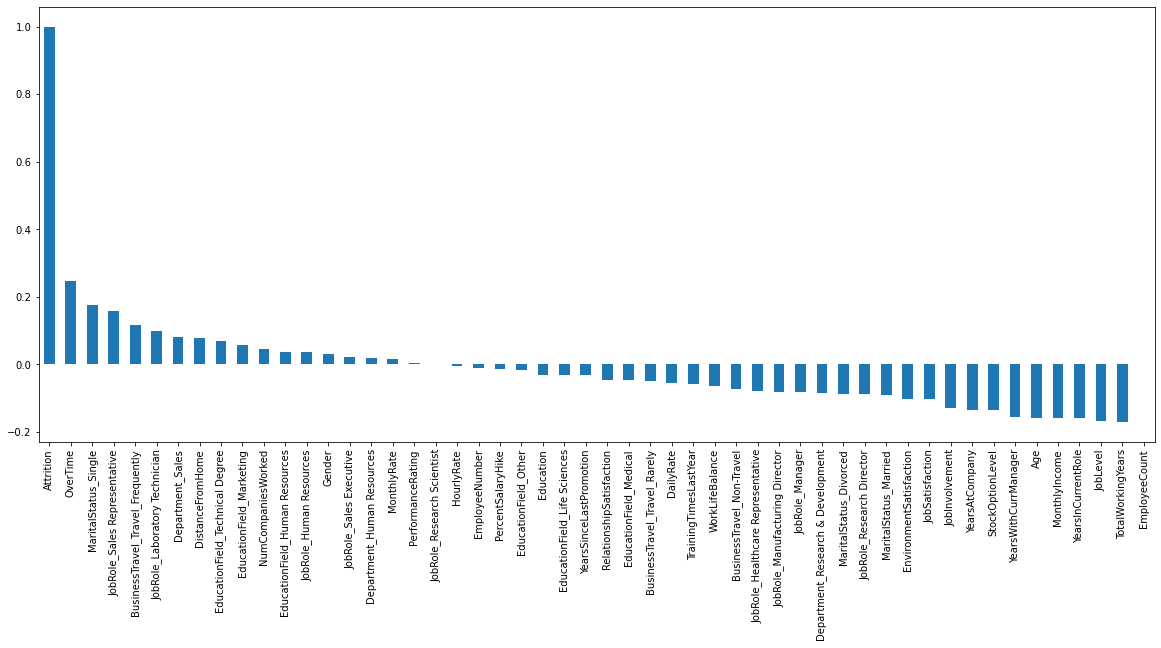

In [30]:
plt.figure(figsize=(20,8))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

D·ªÖ nh·∫≠n th·∫•y ngay l√† 'EmployeeCount' ho√†n to√†n kh√¥ng c√≥ quan h·ªá v·ªõi 'Attrition'.

In [31]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [32]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)

In [33]:
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

**C√°ch 3:**
- S·ª≠ d·ª•ng correlations gi·ªØa c√°c bi·∫øn ƒë·ªôc l·∫≠p v·ªõi nhau:
  + Hai bi·∫øn ƒë·ªôc l·∫≠p khi c√≥ gi√° tr·ªã correlation c√†ng cao th√¨ ch·ª©ng t·ªè ch√∫ng c√†ng mang th√¥ng tin gi·ªëng nhau cho ng·ªØ c·∫£nh c·ªßa b√†i to√°n.
  + Do ƒë√≥ khi hai bi·∫øn ƒë·ªôc l·∫≠p c√≥ correlation cao th√¨ c√≥ th·ªÉ ch·ªçn m·ªôt trong hai ƒë·ªÉ √°p d·ª•ng v√†o vi·ªác hu·∫•n luy·ªán m√¥ h√¨nh.

In [34]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

feature1                 feature2  correlation
0                    JobLevel            MonthlyIncome     0.950300
1                    JobLevel        TotalWorkingYears     0.782208
2               MonthlyIncome        TotalWorkingYears     0.772893
3           PercentSalaryHike        PerformanceRating     0.773550
4              YearsAtCompany       YearsInCurrentRole     0.758754
5              YearsAtCompany     YearsWithCurrManager     0.769212
6          YearsInCurrentRole     YearsWithCurrManager     0.714365
7  Department_Human Resources  JobRole_Human Resources     0.904983
8            Department_Sales  JobRole_Sales Executive     0.808869

- **TotalWorkingYears, JobLevel v√† MonthlyIncome:** C√≥ gi√° tr·ªã correlation r·∫•t cao. Ch·ªçn gi·ªØ l·∫°i MonthlyIncome.
- **PercentSalaryHike v√† PerformanceRating:** C√≥ gi√° tr·ªã correlation l√† 0.77. Ch·ªçn gi·ªØ l·∫°i  PerformanceRating.
- **YearsAtCompany, YearsInCurrentRole, v√† YearsWithCurrManager:** C√≥ gi√° tr·ªã correlation cao. Ch·ªçn gi·ªØ l·∫°i YearsAtCompany.
- **Department_Human Resources v√† JobRole_Human Resources:** C√≥ gi√° tr·ªã correlation l√† 0.9. Ch·ªçn gi·ªØ l·∫°i JobRole_Human Resources.
- **Department_Sales v√† JobRole_Sales Executive:** C√≥ gi√° tr·ªã correlation l√† 0.8. Ch·ªçn gi·ªØ l·∫°i JobRole_Sales Executive.

In [35]:
df.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

In [36]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 44 columns]

## X·ª≠ l√Ω c√°c gi√° tr·ªã thi·∫øu

Th·ªëng k√™ s·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu c·ªßa m·ªói c·ªôt

In [37]:
df.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

B·ªô d·ªØ li·ªáu kh√¥ng t·ªìn t·∫°i b·∫•t k√¨ gi√° tr·ªã thi·∫øu n√†o trong t·∫•t c·∫£ c√°c c·ªôt thu·ªôc t√≠nh. V·∫≠y c√≥ th·ªÉ b·ªè qua b∆∞·ªõc n√†y.

## Feature Scaling

- Khi kho·∫£ng gi√° tr·ªã gi·ªØa 2 thu·ªôc t√≠nh qu√° c√°ch xa nhau th√¨ vi·ªác m√¥ h√¨nh h√≥a c≈©ng nh∆∞ tr·ª±c quan m·ªëi quan h·ªá c√≥ th·ªÉ g·∫∑p kh√≥ khƒÉn, do ƒë√≥ ph·∫£i th·ª±c hi·ªán kƒ© thu·∫≠t 'Feature Scaling' hay vi·ªát h√≥a l√† 'Co gi√£n thu·ªôc t√≠nh'.
- C√≥ 3 ph∆∞∆°ng ph√°p feature scaling ch√≠nh l√†:
  + Standardisation (Ch√≠nh quy h√≥a): L√†m cho t·∫≠p d·ªØ li·ªáu c√≥ trung b√¨nh l√† 0 v√† ƒë·ªô l·ªách chu·∫©n l√† 1 v√† ƒë∆∞·ª£c √°p d·ª•ng cho h·∫ßu h·∫øt c√°c tr∆∞·ªùng h·ª£p c·∫ßn feature scaling.
  + Normalisation (Ti√™u chu·∫©n h√≥a): L√†m cho c√°c gi√° tr·ªã trong t·∫≠p d·ªØ li·ªáu thu·ªôc ƒëo·∫°n [0, 1] v√† ƒë∆∞·ª£c √°p d·ª•ng n·∫øu t·∫≠p d·ªØ li·ªáu tu√¢n theo ph√¢n ph·ªëi chu·∫©n.
  + MinMax Scaler: ƒê∆∞a c√°c gi√° tr·ªã v·ªÅ kho·∫£ng gi·ªØa 2 gi√° tr·ªã min v√† max trong mi·ªÅn gi√° tr·ªã c·ªßa thu·ªôc t√≠nh, c√≥ th·ªÉ l√† ƒëo·∫°n [-1, 0], [0, 1], [-1, 1],...
- Trong b√†i n√†y nh√≥m ch·ªçn ph∆∞∆°ng ph√°p Standardisation ƒë·ªÉ scaling kho·∫£ng gi√° tr·ªã c·ªßa thu·ªôc t√≠nh v·ªÅ kho·∫£ng g·∫ßn h∆°n v·ªõi gi√° tr·ªã c·ªßa t·∫≠p y.
- **Nh√≥m s·∫Ω kh√¥ng c√†i ƒë·∫∑t ·ªü b∆∞·ªõc n√†y m√† s·∫Ω t√≠ch h·ª£p vi·ªác feature scaling v√†o Pipeline c·ªßa th∆∞ vi·ªán sklearn trong b∆∞·ªõc x√¢y d·ª±ng m√¥ h√¨nh v·ªÅ sau.**

# III. X√ÇY D·ª∞NG M√î H√åNH H·ªåC M√ÅY

## 1. Logistic Regression cho Ph√¢n lo·∫°i nh·ªã ph√¢n

**M√¥ t·∫£ b√†i to√°n:**
- M·ª•c ti√™u c·ªßa b√†i to√°n ph√¢n lo·∫°i nh·ªã ph√¢n l√† d·ª± ƒëo√°n x√°c su·∫•t thu·ªôc v·ªÅ m·ªôt trong hai l·ªõp c·∫ßn ph√¢n l·ªõp c·ªßa m·ªôt bi·∫øn ph·ª• thu·ªôc d·ª±a v√†o c√°c bi·∫øn ƒë·ªôc l·∫≠p(hay c√≤n g·ªçi l√† thu·ªôc t√≠nh).
- Trong b·ªô d·ªØ li·ªáu n√†y ch√∫ng ta s·∫Ω th·ª≠ d·ª± ƒëo√°n **x√°c su·∫•t thu·ªôc v·ªÅ l·ªõp 0 ho·∫∑c 1 c·ªßa bi·∫øn Attrition d·ª±a v√†o c√°c thu·ªôc t√≠nh ƒë·ªôc l·∫≠p kh√°c c·ªßa m·ªôt ng∆∞·ªùi nh√¢n vi√™n.**

**Cost Function:**
- B·∫Øt ƒë·∫ßu v·ªõi vi·ªác x√¢y d·ª±ng m·ªôt hypothesis t∆∞∆°ng t·ª± nh∆∞ b√†i to√°n linear regression: $h_{\theta}$(x): $\theta_{0}$ + $\theta_{1}$x v·ªõi $\theta_{i}$ (i=0,1) l√† c√°c tham s·ªë (parameters) c·ªßa c√¥ng th·ª©c h·ªìi quy v√† $\theta_{0}$ c√≤n ƒë∆∞∆°c g·ªçi l√† h·ªá s·ªë t·ª± do.
- Tuy nhi√™n s·ª≠ d·ª•ng ƒë∆∞·ªùng th·∫≥ng tuy·∫øn t√≠nh l√† kh√¥ng ph√π h·ª£p cho m·ª•c ti√™u c·ªßa b√†i to√°n khi gi√° tr·ªã d·ª± ƒëo√°n c·∫ßn thu·ªôc v√†o m·ªôt trong hai l·ªõp l√† 0 ho·∫∑c 1, nh∆∞ng v·ªõi m·ªôt ƒë∆∞·ªùng th·∫≥ng tuy·∫øn t√≠nh th√¨ $h_{\theta}$(x) c√≥ th·ªÉ l·ªõn h∆°n 1 v√† nh·ªè h∆°n 0.
- L√∫c n√†y c·∫ßn 1 gi·∫£i ph√°p ƒë·ªÉ gi√° tr·ªã d·ª± ƒëo√°n c√≥ th·ªÉ n·∫±m trong kho·∫£ng 0 ƒë·∫øn 1 => truy·ªÅn hypothesis qua m·ªôt h√†m sigmoid m√† gi√° tr·ªã tr·∫£ v·ªÅ c·ªßa m·ªôt h√†m sigmoid n·∫±m trong kho·∫£ng 0 ƒë·∫øn 1.
ƒê·∫∑t z=$h_{\theta}(x)$
$$sigmoid(z)=-\frac{1}{1+e^{-z}}\$$

(H√¨nh ·∫£nh minh h·ªça cho h√†m sigmoid s·∫Ω ƒë∆∞·ª£c tr√¨nh b√†y kƒ© trong file b√°o c√°o c·ªßa nh√≥m).

- L√∫c n√†y, ta c√≥ gi√° tr·ªã d·ª± ƒëo√°n y_hat=sigmoid(z) n·∫±m trong kho·∫£ng t·ª´ 0 ƒë·∫øn 1 hay n√≥i c√°ch kh√°c ƒë√¢y ch√≠nh l√† gi√° tr·ªã x√°c su·∫•t m√† y_hat thu·ªôc v·ªÅ m·ªôt trong hai l·ªõp v·ªõi ƒëi·ªÅu ki·ªán cho tr∆∞·ªõc l√† c√°c thu·ªôc t√≠nh ƒë·∫ßu v√†o kh√°c.
- Th√¥ng th∆∞·ªùng, quy ∆∞·ªõc gi√° tr·ªã tr·∫£ v·ªÅ c·ªßa h√†m sigmoid bi·ªÉu th·ªã cho x√°c su·∫•t thu·ªôc l·ªõp 1 c·ªßa y_hat: y_hat=sigmoid(z)=P(y=1|x) => P(y=0|x) = 1 - y_hat = 1 - P(y=1|x).
- V·∫≠y l√†m th·∫ø n√†o c√≥ th·ªÉ quy ƒë·ªãnh l·ªõp m√† y_hat thu·ªôc v·ªÅ?
  + Ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng m·ªôt gi√° tr·ªã ng∆∞·ª°ng m√† n·∫øu y_hat l·ªõn h∆°n ho·∫∑c b·∫±ng ng∆∞·ª°ng n√†y s·∫Ω thu·ªôc v·ªÅ l·ªõp 1, ng∆∞·ª£c l·∫°i thu·ªôc v·ªÅ l·ªõp 0.
  + Ng∆∞·ª°ng gi√° tr·ªã th√¥ng th∆∞·ªùng s·∫Ω l√† 0.5, ƒëi·ªÅu n√†y t∆∞∆°ng ·ª©ng v·ªõi vi·ªác n·∫øu z>=0 th√¨ y_hat thu·ªôc v·ªÅ l·ªõp 1 (do sigmoid(z>=0)>=0.5).
- Sau khi c√≥ ƒë∆∞·ª£c t·∫≠p c√°c gi√° tr·ªã d·ª± ƒëo√°n c·ªßa c√°c m·∫´u ƒë·∫ßu v√†o, ƒë·ªÉ ƒë√°nh gi√° xem hypothesis ƒë√£ t·ªët hay ch∆∞a ch√∫ng ta x√¢y d·ª±ng m·ªôt h√†m chi ph√≠ ƒë·ªÉ t√≠nh to√°n ƒë·ªô sai l·ªách gi·ªØa gi√° tr·ªã d·ª± ƒëo√°n v√† gi√° tr·ªã th·ª±c t·∫ø.

$$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$

v·ªõi $\hat{y}_{i}$=${y\_hat}_{i}$
- Do c√†ng nhi·ªÅu gi√° tr·ªã d·ª± ƒëo√°n gi·ªëng v·ªõi gi√° tr·ªã th·ª±c t·∫ø c√†ng t·ªët n√™n $J(\theta)$ c√≥ gi√° tr·ªã c√†ng b√© c√†ng t·ªët.

**Gradient Descent:**
- V·ªõi m·ª•c ti√™u l√† c·ª±c ti·ªÉu h√≥a h√†m chi ph√≠ $$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$
- Th√¨ c√°c tham s·ªë $\theta$ s·∫Ω l√† nh·ªØng gi√° tr·ªã m√† ch√∫ng ta c·∫ßn ph·∫£i thay ƒë·ªïi ƒë·ªÉ t·ªëi ∆∞u h√≥a Cost Function, v√† m·ªôt trong nh·ªØng c√°ch ƒë·ªÉ th·ª±c hi·ªán vi·ªác n√†y l√† thu·∫≠t to√°n Gradient Descent.
- Thu·∫≠t to√°n ƒë∆∞·ª£c th·ª±c hi·ªán nh∆∞ sau:
**Trong m·ªói l·∫ßn l·∫∑p c·∫≠p nh·∫≠t m·ªôt c√°ch ƒë·ªìng th·ªùi c√°c tham s·ªë ${\theta}_{j}$ theo c√¥ng th·ª©c nh∆∞ sau:** $$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

Trong ƒë√≥: alpha l√† 'learning rate' gi√∫p vi·ªác h·ªçc ƒë∆∞·ª£c t·ªëi ∆∞u h∆°n.

## 2. S·ª≠ d·ª•ng Pipeline v√† C√°c ƒë·ªô ƒëo ƒë∆∞·ª£c d√πng ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh

**Pipeline:**
- Pipeline l√† m·ªôt c√¥ng c·ª• gi√∫p k·∫øt h·ª£p nhi·ªÅu b∆∞·ªõc x·ª≠ l√Ω d·ªØ li·ªáu v√† hu·∫•n luy·ªán m√¥ h√¨nh th√†nh m·ªôt quy tr√¨nh ho√†n ch·ªânh.
- C√°c b∆∞·ªõc ƒë·ªÉ th·ª±c hi·ªán x√¢y d·ª±ng m·ªôt m√¥ h√¨nh h·ªçc m√°y s·∫Ω ƒë∆∞·ª£c x·∫øp tu·∫ßn t·ª± trong m·ªôt ƒë·ªëi t∆∞·ª£ng Pipeline (c√≥ th·ªÉ xem nh∆∞ m·ªôt ƒë∆∞·ªùng ·ªëng ƒë·ªÉ d·∫´n l·∫ßn l∆∞∆°t ƒëi qua c√°c b∆∞·ªõc).
- Pipeline gi√∫p ti·∫øt ki·ªám th·ªùi gian v√† t·ªëi ∆∞u h√≥a qu√° tr√¨nh hu·∫•n luy·ªán m√¥ h√¨nh.
**C√°c ƒë·ªô ƒëo:**
- C√°c ƒë·ªô ƒëo ƒë∆∞·ª£c nh√≥m s·ª≠ d·ª•ng trong b√†i n√†y s·∫Ω l√†:
  + Accuracy score.
  + Precision.
  + Recall.
  + F1-score.

**(H√¨nh ·∫£nh v·ªÅ pipeline v√† ƒë·ªãnh nghƒ©a c√°c ƒë·ªô ƒëo ƒë∆∞·ª£c nh√≥m tr√¨nh b√†y trong file b√°o c√°o ƒë√≠nh k√®m).**

## 3. C√†i ƒë·∫∑t

**L∆ØU √ù: L√Ω do c·ª• th·ªÉ cho c√°c b∆∞·ªõc th·ª±c hi·ªán d∆∞·ªõi ƒë√¢y s·∫Ω ƒë∆∞·ª£c nh√≥m gi·∫£i th√≠ch m·ªôt c√°ch chi ti·∫øt trong file b√°o c√°o ƒëi k√®m.**

**Khai b√°o c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt:**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

**T·∫°o t·∫≠p c√°c thu·ªôc t√≠nh ƒë·∫ßu v√†o v√† t·∫≠p c√°c bi·∫øn m·ª•c ti√™u t·ª´ b·ªô d·ªØ li·ªáu ban ƒë·∫ßu.**

In [39]:
X=np.array(df.drop(['Attrition'],axis=1))
y=np.array(df['Attrition'])

In [40]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]], dtype=int64)

In [41]:
y

array([1, 0, 1, ..., 0, 0, 0])

**Chia t·∫≠p d·ª± li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra:**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [43]:
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


**C√†i ƒëƒÉt m√¥ h√¨nh:**

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Gi·∫£i th√≠ch Pipeline: X√¢y d·ª±ng m·ªôt pipeline th·ª±c hi·ªán c√°c b∆∞·ªõc sau:
- ƒê·∫ßu ti√™n t·∫°o m·ªôt th√†nh ph·∫ßn 'scaler' th·ª±c hi·ªán vi·ªác chu·∫©n h√≥a d·ªØ li·ªáu nh∆∞ ƒë√£ ƒë·ªÅ c·∫≠p ·ªü m·ª•c cu·ªëi c·ªßa ph·∫ßn ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu. Th√†nh ph·∫ßn n√†y s·ª≠ d·ª•ng l·ªõp StandardScaler() ƒë∆∞·ª£c cung c·∫•p b·ªüi sklearn ƒë·ªÉ th·ª±c hi·ªán chu·∫©n h√≥a gi√° tr·ªã c·ªßa t·ª´ng c·ªôt trong X theo ph∆∞∆°ng ph√°p Standardisation (Ch√≠nh quy h√≥a).
- Ti·∫øp theo l√† t·∫°o m·ªôt b·ªô ph√¢n l·ªõp 'classifier' ƒë·ªÉ th·ª±c hi·ªán vi·ªác ph√¢n lo·∫°i c√°c m·∫´u ƒë·∫ßu v√†o v·ªÅ m·ªôt trong hai l·ªõp c·ªßa b√†i to√°n ph√¢n lo·∫°i nh·ªã ph√¢n. B·ªô ph√¢n l·ªõp n√†y √°p d·ª•ng thu·∫≠t to√°n Logistic Regression m√† nh√≥m ƒë√£ gi·ªõi thi·ªáu tr∆∞·ªõc ƒë√≥ (C√°c tham s·ªë trong l·ªõp LogisticRegression s·∫Ω ƒë∆∞·ª£c gi·∫£i th√≠ch trong file b√°o c√°o ƒëi k√®m).

In [46]:
#d·ª± ƒëo√°n
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

**ƒê√°nh gi√° m√¥ h√¨nh:** Tr∆∞·ªõc ti√™n xem x√©t gi√° tr·ªã c·ªßa accuracy score.

In [47]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


Accuracy Score ƒë·∫°t kh√° cao nh∆∞ng li·ªáu ƒë√£ ƒë·ªß t·ªët cho vi·ªác ƒë√°nh gi√° m·ª©c ƒë·ªô hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh?

H√£y c√πng xem x√©t th√™m v·ªÅ c√°c ƒë·ªô ƒëo kh√°c.

In [48]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294



ƒê√∫ng l√† ƒë·ª´ng n√™n v·ªôi tin nh·ªØng ƒëi·ªÅu m√†u h·ªìng tr∆∞·ªõc m·∫Øt üòÉ

- C√°c ƒë·ªô ƒëo kh√°c nh∆∞ Precision, Recall v√† F1-score ƒë·ªÅu r·∫•t th·∫•p ·ªü l·ªõp 1 h∆°n so v·ªõi ·ªü l·ªõp 0, ch·ª©ng t·ªè m√¥ h√¨nh d·ª± ƒëo√°n ch∆∞a t·ªët cho c√°c tr∆∞·ªùng d·ª± ƒëo√°n m·∫´u thu·ªôc th·ª±c t·∫ø thu·ªôc v·ªÅ l·ªõp 1 (hay n√≥i trong ng·ªØ c·∫£nh n√†y l√† c√°c m·∫´u thu·ªôc v·ªÅ l·ªõp ti√™u c·ª±c).
- V√† ƒëi·ªÅu n√†y l√†m ch√∫ng ta c√≥ th·ªÉ nghƒ© ƒë·∫øn tr∆∞·ªùng h·ª£p m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu (imbalanced data).

**Ki·ªÉm tra t√≠nh c√¢n b√†ng c·ªßa d·ªØ li·ªáu:**

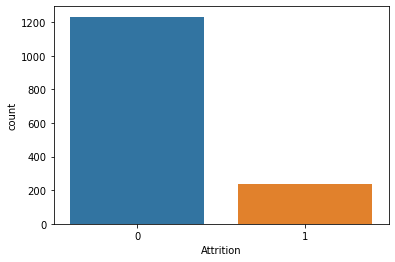

In [51]:
sns.countplot(data=df,x=df['Attrition']);

- R√µ r√†ng x·∫£y ra hi·ªán t∆∞·ª£ng m·∫•t c√¢n b·∫±ng gi·ªØa hai l·ªõp 0 v√† 1 khi s·ªë l∆∞·ª£ng c√°c ph·∫ßn t·ª≠ thu·ªôc l·ªõp 0 trong b·ªô d·ªØ li·ªáu n√†y nhi·ªÅu x·∫•p x·ªâ g·∫•p 6 l·∫ßn s·ªë l∆∞·ª£ng c√°c ph·∫ßn t·ª≠ thu·ªôc l·ªõp 1.
- S·ª± m·∫•t c√¢n b·∫±ng nghi√™m tr·ªçng n√†y ·∫£nh h∆∞·ªüng r·∫•t l·ªõn ƒë·∫øn kh·∫£ nƒÉng d·ª± ƒëo√°n ch√≠nh x√°c c·ªßa m√¥ h√¨nh.

## M·∫•t c√¢n b·∫±ng d·ªØ li·ªáu v√† c√°ch gi·∫£i quy·∫øt

- D·ªØ li·ªáu b·ªã m·∫•t c√¢n b·∫±ng hi·ªÉu s·ª± ph√¢n b·ªï c√°c m·∫´u tr√™n c√°c l·ªõp ch√™ch l·ªách nhau qu√° l·ªõn d·∫´n t·ªõi vi·ªác m√¥ h√¨nh ch·ªâ t·∫≠p trung h·ªçc nh·ªØng ƒë·∫∑c tr∆∞ng c·ªßa l·ªõp c√≥ s·ªë l∆∞·ª£ng m·∫´u l√† chi·∫øm ƒëa s·ªë. L√†m cho vi·ªác d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh x·∫£y ra t√¨nh tr·∫°ng thi√™n v·ªã, m·∫•t ƒëi t√≠nh t·ªïng qu√°t cho d·ªØ li·ªáu th·ª±c t·∫ø sau n√†y.
- C√≥ nhi·ªÅu c√°ch x·ª≠ l√Ω vi·ªác m·∫•t cƒÉn b·∫±ng d·ªØ li·ªáu nh∆∞: Thu th·∫≠p th√™m d·ªØ li·ªáu, c√°c thu·∫≠t to√°n tƒÉng m·∫´u d·ªØ li·ªáu (Oversampling), c√°c thu·∫≠t to√°n gi·∫£m m·∫´u d·ªØ li·ªáu (Undersampling), s·ª≠ d·ª•ng tr·ªçng s·ªë ƒë·ªÉ ph·∫°t m√¥ h√¨nh cho c√°c gi√° tr·ªã d·ª± ƒëo√°n c·ªßa c√°c l·ªõp,....
- Trong ph·∫ßn n√†y nh√≥m s·∫Ω th·ª±c hi·ªán hai ph∆∞∆°ng ph√°p:
  + S·ª≠ d·ª•ng **tr·ªçng s·ªë** ƒë·ªÉ ph·∫°t m√¥ h√¨nh.
  + ·ª®ng d·ª•ng **Thu·∫≠t to√°n SMOTE** thu·ªôc nh√≥m Oversampling.
  
**(Chi ti·∫øt v·ªÅ m·∫∑t l√Ω thuy·∫øt c·ªßa m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu, t√°c h·∫°i c·ªßa m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu, ph∆∞∆°ng ph√°p s·ª≠ d·ª•ng tr·ªçng s·ªë, ph∆∞∆°ng ph√°p s·ª≠ d·ª•ng thu·∫≠t to√°n SMOTE s·∫Ω ƒë∆∞·ª£c nh√≥m tr√¨nh b√†y trong file b√°o c√°o ƒë√≠nh k√®m).**

**S·ª≠ d·ª•ng tr·ªçng s·ªë ƒë·ªÉ tƒÉng vi·ªác ph·∫°t m√¥ h√¨nh n·∫øu d·ª± ƒëo√°n sai l·ªõp:**

In [49]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [52]:
predictions2=pipe2.predict(X_test)

In [55]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [56]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294



- V·ªõi vi·ªác s·ª≠ d·ª•ng m·ªôt tr·ªçng s·ªë l·ªõn h∆°n cho l·ªõp 1m ƒë√£ gi√∫p c·∫£i thi·ªán precision v√† f1-score c·ªßa l·ªõp 1 m·ªôt c√°ch ƒë√°ng k·ªÉ, cho th·∫•y t√≠nh t·ªïng qu√° c·ªßa m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c tƒÉng l√™n.
- Tuy nhi√™n c√°c ƒë·ªô ƒëo n√†y v·∫´n ch∆∞a ƒë·∫°t ƒë∆∞·ª£c ƒë·∫øn gi√° tr·ªã th·∫≠t s·ª± t·ªët l·∫Øm cho m·ªôt b√†i to√°n ph√¢n lo·∫°i.
- V√† nh√≥m c≈©ng ƒë√£ th·ª±c nghi·ªám v·ªõi nhi·ªÅu c·∫∑p tr·ªçng s·ªë kh√°c nhau nh∆∞ng k·∫øt qu·∫£ thu ƒë∆∞·ª£c t·ªët nh·∫•t v√† l√† {0:1, 1:2}.

**√Åp d·ª•ng thu·∫≠t to√°n SMOTE:**

In [ ]:
!pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

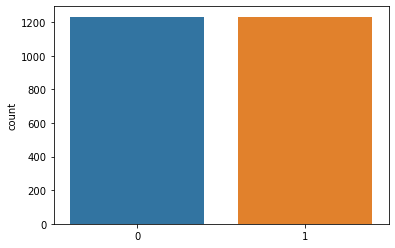

In [58]:
sns.countplot(x=y);

**Chia t·∫≠p d·ª± li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra:**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [60]:
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


**C√†i ƒë·∫∑t m√¥ h√¨nh:**

In [61]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
#d·ª± ƒëo√°n
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

**ƒê√°nh gi√° m√¥ h√¨nh:**

In [63]:
#Tr∆∞·ªõc ti√™n xem x√©t accuracy score c·ªßa m√¥ h√¨nh
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [64]:
#Xem x√©t chi ti·∫øt h∆°n ƒë·∫øn c√°c gi√° tr·ªã metric kh√°c nh∆∞ F1-score hay Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494



- T·∫•t c·∫£ c√°c ƒë·ªô ƒëo ƒë·ªÅu ƒë·∫°t ·ªü m·ª©c 90% ho·∫∑c h∆°n, cho th·∫•y s·ª± hi·ªáu qu·∫£ c·ªßa thu·∫≠t to√°n SMOTE tr√™n b·ªô d·ªØ li·ªáu n√†y.

# IV. T·ªîNG K·∫æT

- Nh√≥m s·∫Ω kh√¥ng ƒëi s√¢u v√†o vi·ªác r√∫t ra √Ω nghƒ©a n√†o t·ª´ b·ªô d·ªØ li·ªáu th√¥ng qua vi·ªác x√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y. ƒêi·ªÅu n√†y ƒë∆∞·ª£c th·ª±c hi·ªán ·ªü m·ªôt giai ƒëo·∫°n kh√°c ch√≠nh l√† EDA b·ªô d·ªØ li·ªáu.
- Th√¥ng qua m√¥ h√¨nh h·ªçc m√°y nh√≥m ch√∫ tr·ªçng v√†o c√°c kh√≠a c·∫°nh:
  + Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu.
  + R√∫t tr√≠ch ƒë·∫∑c tr∆∞ng.
  + X√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y hi·ªáu qu·∫£.

- Nh√≥m ƒë√£ ph√°t hi·ªán v·∫•n ƒë·ªÅ v·ªÅ m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu x·∫£y ra tr√™n b·ªô d·ªØ li·ªáu n√†y, m·ªôt ƒëi·ªÅu g√¢y nhi·ªÅu kh√≥ khƒÉn cho qu√° tr√¨nh x√¢y d·ª±ng c√°c b·ªô ph√¢n l·ªõp.
- Th·ª±c hi·ªán c√°c ph∆∞∆°ng ph√°p ƒë·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu v√† x√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y ƒë·ªÉ s·ª≠ d·ª•ng nh∆∞ b·ªô ph√¢n l·ªõp v·ªõi c√°c ƒë·ªô ƒëo ƒë·∫°t k·∫øt qu·∫£ r·∫•t kh·∫£ quan:
  + Accuracy score: 90%.
  + Precision macro average: 91%.
  + Recall macro average: 91%.
  + F1-Score macro average: 90%.